In [15]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

warnings.filterwarnings('ignore')


## #1 (data_2d.csv)

In [16]:
df = pd.read_csv('data/data_2d.csv', header=None)
df.drop(df.columns[0], axis=1, inplace=True)
df.columns = ['x', 'y']
df.head().round(2)


,x,y
0,-0.77,0.46
1,2.69,2.37
2,-0.20,0.47
3,0.61,1.23
4,-0.08,1.14


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       200 non-null    float64
 1   y       200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [18]:
df.describe()

,x,y
count,200.000000,200.000000
mean,1.758886,2.211502
std,1.239986,1.605176
min,-1.488928,-1.344141
25%,0.874456,0.955211
50%,1.729753,2.282891
75%,2.701499,3.602253
max,4.554605,5.722027


<Axes: xlabel='x', ylabel='y'>

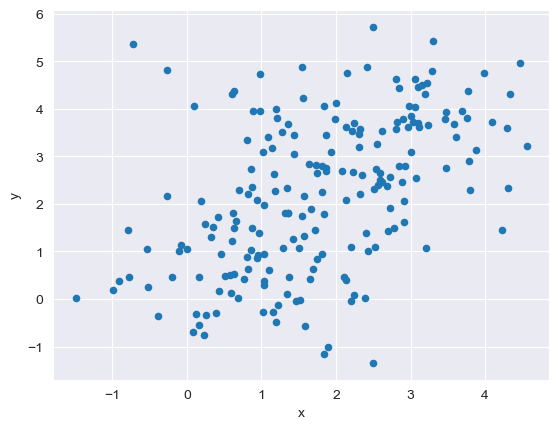

In [19]:
df.plot(kind='scatter', x='x', y='y')

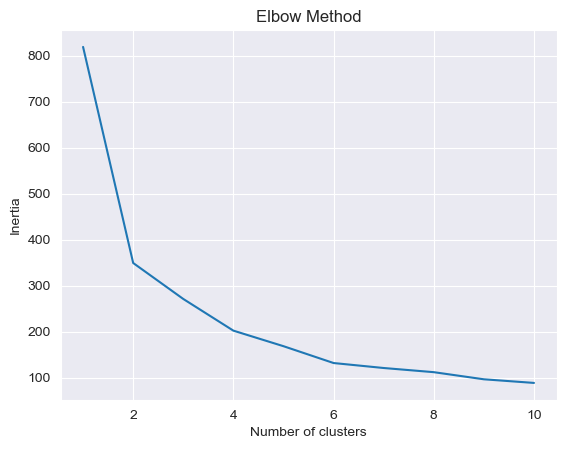

In [20]:
from sklearn.cluster import KMeans

inertia_values = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init='auto').fit(df)
    inertia_values.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia_values)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

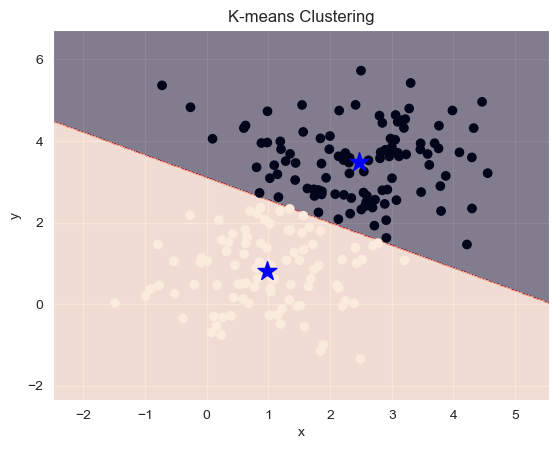

In [56]:
kmeans_2d = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(df)
x_min, x_max = df['x'].min() - 1, df['x'].max() + 1
y_min, y_max = df['y'].min() - 1, df['y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = kmeans_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.5)

plt.scatter(df['x'], df['y'], c=kmeans_2d.labels_)
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], c='blue', marker='*', s=200)
plt.title('K-means Clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [69]:
print(f" inertia: {kmeans_2d.inertia_}\n")
print(f" centers: {kmeans_2d.cluster_centers_.round(2)}\n")

 inertia: 348.9655117484038

 centers: [[2.47 3.49]
 [0.98 0.8 ]]


## #2 (mnist.csv)

In [23]:
df_mnist = pd.read_csv('data/mnist.csv', header=None)
df_mnist.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df_mnist.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,500.000000,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0
mean,4.378000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.506000,0.256000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.873958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.314504,5.724334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,128.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_mnist = scaler.fit_transform(df_mnist)
df_mnist = pd.DataFrame(df_mnist)
df_mnist.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,500.00,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,500.00,500.00,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0
mean,-0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-1.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.04,-0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,-0.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.04,-0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,-0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.04,-0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.04,-0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.34,22.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_mnist = pca.fit_transform(df_mnist)
df_mnist = pd.DataFrame(df_mnist)
print(pca.explained_variance_ratio_)
df_mnist

[0.07296641 0.05100684]


,0,1
0,-4.528471,4.197883
1,5.025790,-12.463459
2,-6.907382,-5.889928
3,8.584192,-0.337152
4,1.105933,6.577999
...,...,...
495,8.575637,-1.874111
496,-3.367079,7.348853
497,-6.208005,0.235244
498,0.380141,-0.371853


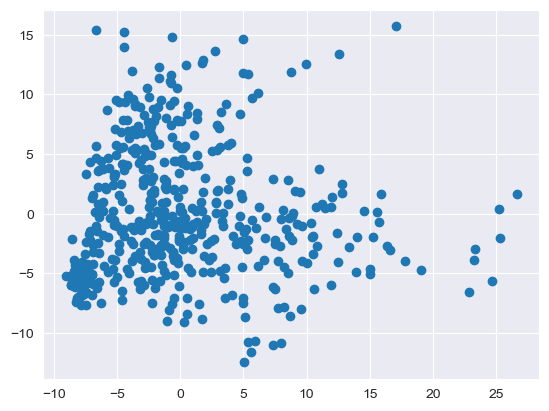

In [27]:
plt.scatter(df_mnist[0], df_mnist[1])

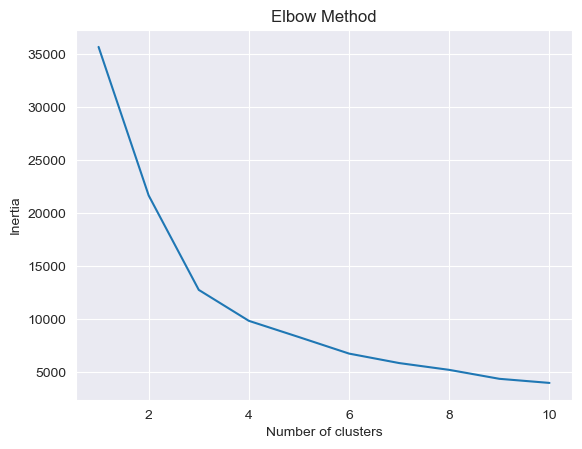

In [70]:
inertia_values = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init='auto').fit(df_mnist)
    inertia_values.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia_values)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


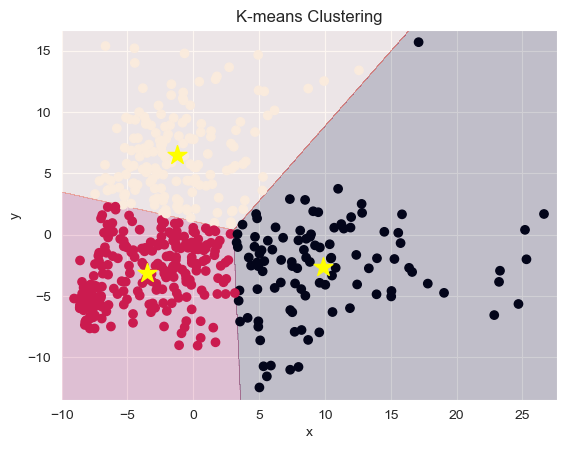

In [74]:
kmeans_mnist = KMeans(n_clusters=3, random_state=0, n_init='auto').fit(df_mnist)
x_min, x_max = df_mnist[0].min() - 1, df_mnist[0].max() + 1
y_min, y_max = df_mnist[1].min() - 1, df_mnist[1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = kmeans_mnist.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(df_mnist[0], df_mnist[1], c=kmeans_mnist.labels_)
plt.scatter(kmeans_mnist.cluster_centers_[:, 0], kmeans_mnist.cluster_centers_[:, 1], c='yellow', marker='*', s=200)
plt.title('K-means Clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [73]:
kmeans_mnist.inertia_

12753.07268199869